# Sales Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

## Merging 12 months data into a single csv file

In [11]:
df=pd.read_csv("./Sales_data/Sales_April_2019.csv")
files=[file for file in os.listdir("./Sales_Data")]

all_data=pd.DataFrame()

for file in files:
    df=pd.read_csv("./Sales_data/"+file)
    all_data=pd.concat([all_data,df])
    
all_data.to_csv("all_data.csv",index=False)

In [12]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [13]:
data=pd.read_csv("all_data.csv")

## Columns in data

In [14]:
data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

## Rows and Columns in data

In [15]:
data.shape

(186850, 6)

##  Overall Stats of data

In [16]:
data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [17]:
data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [18]:
data.dropna(how="all",inplace=True)
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [19]:
data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

## Information of Data Set

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


## Dropping rows that contain useless Value 

In [21]:
data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [22]:
data[data["Price Each"]=="Price Each"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [23]:
data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [24]:
new_data=data.drop(data[data["Price Each"]=="Price Each"].index)

In [25]:
data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

## Changing data type of Quantity ordered and Price Columns

In [26]:
new_data["Quantity Ordered"]=new_data["Quantity Ordered"].astype("int")
new_data["Price Each"]=new_data["Price Each"].astype("float")

## Adding Sales Column

In [27]:
new_data["Sales"]=new_data["Quantity Ordered"]*new_data["Price Each"]

In [28]:
new_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Sales'],
      dtype='object')

## Adding Month Column

In [29]:
new_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Sales'],
      dtype='object')

In [30]:
new_data["Order Date"]=pd.to_datetime(new_data["Order Date"], format="%m/%d/%y %H:%M") 

In [31]:
new_data["Order Month"]=new_data["Order Date"].dt.month_name()

In [32]:
new_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Order Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,April
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,April
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,April
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,April
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,April
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",8.97,September
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",700.00,September
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",700.00,September
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",379.99,September


## What was the best month for Sales? How much was earned that month?

In [33]:
new_data.groupby("Order Month")["Sales"].sum().sort_values(ascending=False)

Order Month
December     4613443.34
October      3736726.88
April        3390670.24
November     3199603.20
May          3152606.75
March        2807100.38
July         2647775.76
June         2577802.26
August       2244467.88
February     2202022.42
September    2097560.13
January      1822256.73
Name: Sales, dtype: float64

In [55]:
new_data["Order Dates"]=new_data["Order Date"].dt.month

In [56]:
monthly_sales_result=new_data.groupby("Order Dates")["Sales"].sum()

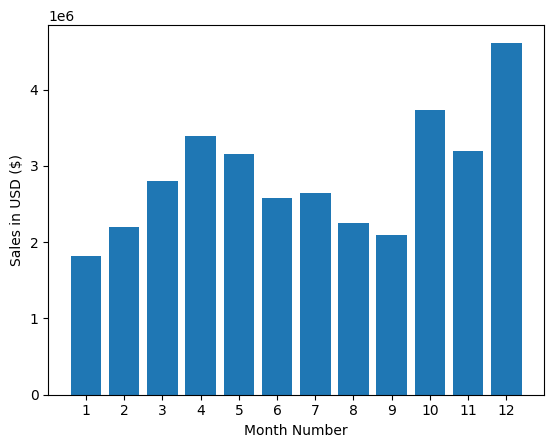

In [57]:
months=range(1,13)
plt.bar(months,monthly_sales_result)
plt.xticks(months)
plt.ylabel("Sales in USD ($)")
plt.xlabel("Month Number")
plt.show()

## City that has highest number of Sales

In [37]:
new_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Sales', 'Order Month', 'Order Dates'],
      dtype='object')

In [38]:
new_data["City"]=new_data["Purchase Address"].str.split(',').str[1].str.strip()

In [39]:
new_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Order Month,Order Dates,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,April,4,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,April,4,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,April,4,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,April,4,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,April,4,Los Angeles
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",8.97,September,9,Los Angeles
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",700.00,September,9,San Francisco
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",700.00,September,9,San Francisco
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",379.99,September,9,San Francisco


In [40]:
sales_by_city=new_data.groupby("City")["Sales"].sum()
sales_by_city.sort_values(ascending=False)

City
San Francisco    8262203.91
Los Angeles      5452570.80
New York City    4664317.43
Boston           3661642.01
Atlanta          2795498.58
Dallas           2767975.40
Seattle          2747755.48
Portland         2320490.61
Austin           1819581.75
Name: Sales, dtype: float64

In [41]:
city=[city for city, df in new_data.groupby("City")]

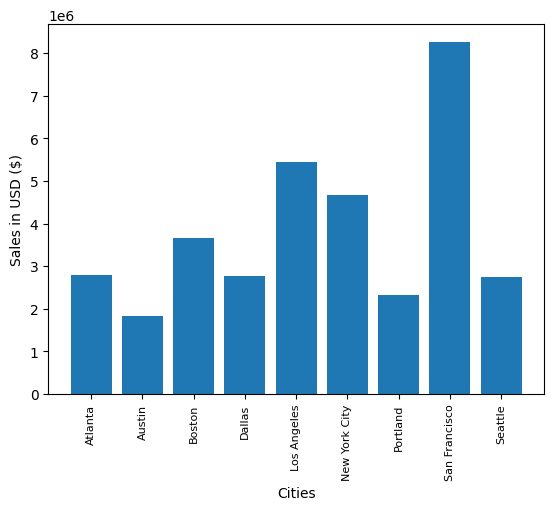

In [42]:
plt.bar(city,sales_by_city)
plt.xticks(city,rotation='vertical',size=8)
plt.ylabel("Sales in USD ($)")
plt.xlabel("Cities")
plt.show()

## What time to display advertisements to maximize likelihood of customer's buying products?

In [43]:
new_data["Time"]=new_data["Order Date"].dt.time

In [44]:
new_data["Time"]=pd.to_datetime(new_data['Time'], format='%H:%M:%S')

In [45]:
new_data["Hour"]=new_data["Time"].dt.hour

In [46]:
new_data["Hour"]

0          8
2         22
3         14
4         14
5          9
          ..
186845    20
186846    16
186847     7
186848    17
186849     0
Name: Hour, Length: 185950, dtype: int32

In [47]:
orders_by_hour=new_data.groupby("Hour")["Order ID"].count()
hour=new_data["Hour"].unique()

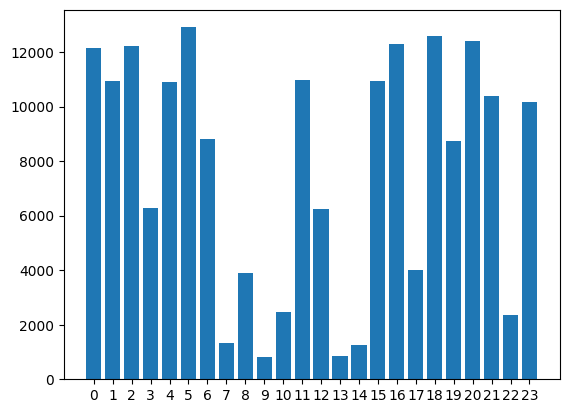

In [48]:
plt.bar(hour,orders_by_hour)
plt.xticks(hour)
plt.show()

In [49]:
# Define the time range labels
time_ranges = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12',
               '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-24']

# Define the time range bins
time_bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

In [50]:
new_data['Time Range'] = pd.cut(new_data['Hour'], bins=time_bins, labels=time_ranges, right=False)

In [51]:
orders_by_hour_range=new_data.groupby("Time Range").count()

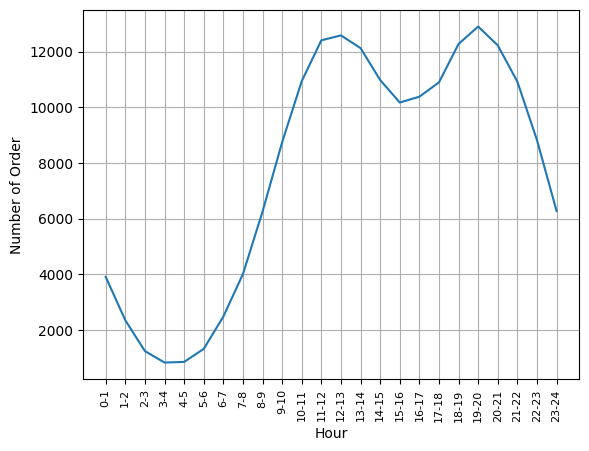

In [52]:
plt.plot(time_ranges,orders_by_hour)
plt.xticks(time_ranges,rotation='vertical',size=8)
plt.xlabel("Hour")
plt.ylabel("Number of Order")
plt.grid()
plt.show()

## Which product sold the most

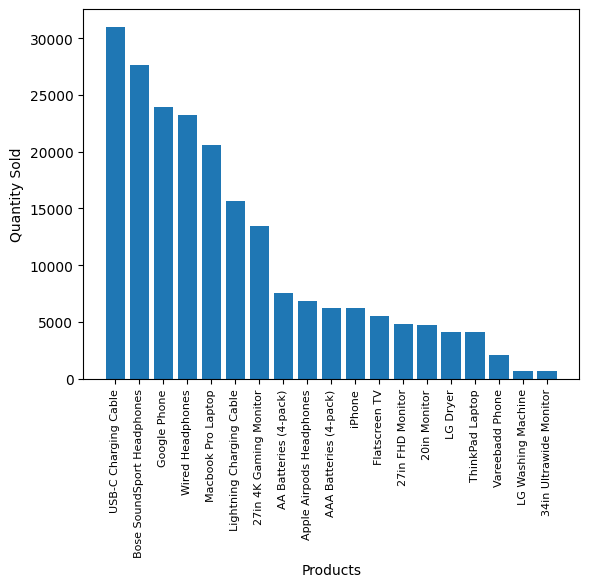

In [53]:
quantity_of_products=new_data.groupby("Product")["Quantity Ordered"].sum().sort_values(ascending=False)
products=new_data["Product"].unique()
plt.bar(products,quantity_of_products)
plt.xticks(products,rotation='vertical',size=8)
plt.xlabel("Products")
plt.ylabel("Quantity Sold")
plt.show()

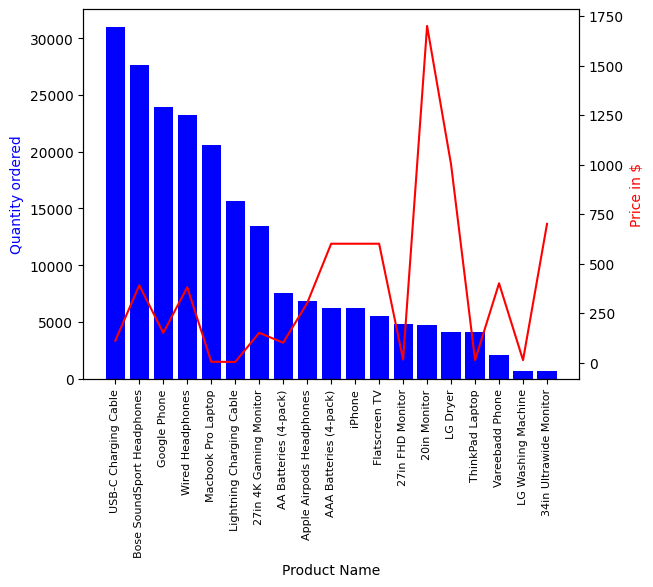

In [54]:
prices=new_data.groupby("Product")["Price Each"].mean()

fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(products,quantity_of_products,color='b')
ax2.plot(products,prices,color='r')

ax1.set_xlabel('Product Name')
ax1.set_xticklabels(products,rotation='vertical',size=8)
ax1.set_ylabel("Quantity ordered",color='b')
ax2.set_ylabel("Price in $",color='r')
plt.show()